Titanic Survival rate predictions with SVM & Random Forest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import  SVC
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier


In [2]:
#Reading train dataset

df = pd.read_csv(r'C:\Users\Priti\Desktop\corpnce_data_science\titanic\train.csv', sep=',')
print(df.shape)
print(df.columns)
df.set_index('PassengerId', inplace=True)
df.head()


(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#number of people survived. 1 for survival and 0 for not survival
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [4]:
#Out of 891 how many male and female members
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [5]:
#survival count based on gender. o
df.groupby(['Sex','Survived']).size()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

In [6]:
#Provide how many non-null values and datatype of each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
#describe the quantitative feature
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.dtypes #datatype of each feature

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [9]:
#Drop Name, ticket column as these columns are not useful for predictions
df.drop(['Name','Ticket','Cabin'], axis=1, inplace=True)

#checking survival rate based on Embarked column
print(df.groupby('Survived').Embarked.value_counts(), '\n')
print(df.Embarked.unique(), '\n')
print(df.Embarked.isnull().sum(), '\n')

# replacing 2 NaN into S, as S is the most occured value
df.Embarked.replace(np.nan, 'S', inplace=True)


Survived  Embarked
0         S           427
          C            75
          Q            47
1         S           217
          C            93
          Q            30
Name: Embarked, dtype: int64 

['S' 'C' 'Q' nan] 

2 



In [10]:
#Embarked has nominal values, so creating dummy variables
dummy_emb = pd.get_dummies(df.Embarked)
dummy_emb.head()
dummy_emb.columns = ['col1','col2','col3']
dummy_emb.drop(['col3'], axis=1, inplace=True)

# drop Embarked colum as we created dummy variable 
del df['Embarked']

#concatenate dummy variables into df
df = pd.concat([df, dummy_emb], axis=1)
df.head()



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,col1,col2
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,0,0
2,1,1,female,38.0,1,0,71.2833,1,0
3,1,3,female,26.0,0,0,7.9250,0,0
4,1,1,female,35.0,1,0,53.1000,0,0
5,0,3,male,35.0,0,0,8.0500,0,0


In [11]:
#take mean and std deviation of age column, generate random numbers in that range and replace them with NaN 
mean1 = df.Age.mean()
std1 = df.Age.std()
null1 = df.Age.isnull().sum()


rand1 = np.random.randint(mean1-std1,mean1+std1, size=null1 )


E:\anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0

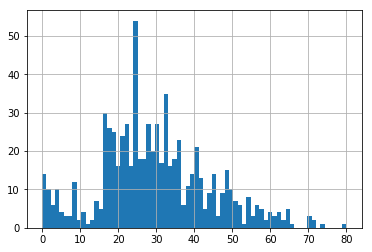

In [12]:
#drop all null values, and convert to int and draw histogram

df['Age'].dropna().astype(int).hist(bins=70)

# fill NaN values in Age column with random values generated
df["Age"][np.isnan(df["Age"])] = rand1
df.Age.isnull().sum()



In [13]:
#convert age column type float into int
df['Age'] = df['Age'].astype(int)

297
82
86
62
38


Text(0.5,1,'Survival rate based on age group')

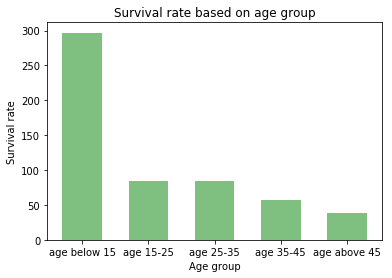

In [14]:
#survival count between age below 15
age15 = df[(df['Age'] >=15) & df['Survived'] ==1]
print(len(age15))

#survival count between age group 15-25
age25 = df[(df['Age'] > 15) & (df['Age']< 25) & df['Survived'] ==1]
print(len(age25))


#survival count between age group 25-35
age35 = df[(df['Age'] > 25) & (df['Age']< 35) & df['Survived'] ==1]
print(len(age35))

#survival count between age group 35-45
age45 = df[(df['Age'] > 35) & (df['Age']< 45) & df['Survived'] ==1]
print(len(age45))

#survival count between age group above 45
age46_above = df[(df['Age'] > 45) & df['Survived'] ==1]
print(len(age46_above))

x_axis = ['age below 15','age 15-25', 'age 25-35','age 35-45', 'age above 45']
y_axis = [297,84,85,57,38]
plt.bar(x_axis,y_axis, width=0.6, color='green', alpha=.5)
plt.xlabel('Age group')
plt.ylabel('Survival rate')
plt.title('Survival rate based on age group')




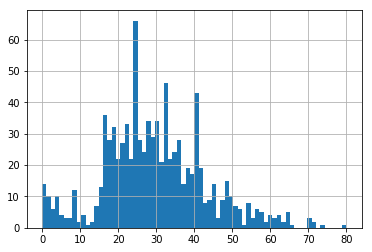

In [15]:
# plot new age column
df.Age.hist(bins=70)

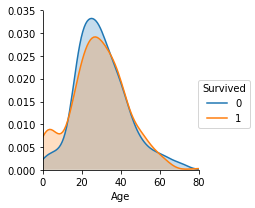

In [17]:
#plot for number of people survived or not based on age group

facet = sns.FacetGrid(df, hue="Survived")
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()

In [18]:
#convert sex column into numeric.. 1 for male and 2 for female
df.Sex.replace(('male','female'), (1,2), inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,col1,col2
PassengerId,,,,,,,,,
1,0,3,1,22,1,0,7.2500,0,0
2,1,1,2,38,1,0,71.2833,1,0
3,1,3,2,26,0,0,7.9250,0,0
4,1,1,2,35,1,0,53.1000,0,0
5,0,3,1,35,0,0,8.0500,0,0


In [19]:
y = df['Survived']
X = df.loc[:,'Pclass':'col2']


In [20]:
X.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,col1,col2
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,1.352413,29.720539,0.523008,0.381594,32.204208,0.188552,0.086420
std,0.836071,0.477990,13.503783,1.102743,0.806057,49.693429,0.391372,0.281141
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,21.000000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,3.000000,1.000000,29.000000,0.000000,0.000000,14.454200,0.000000,0.000000
75%,3.000000,2.000000,38.000000,1.000000,0.000000,31.000000,0.000000,0.000000
max,3.000000,2.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000


In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
X_scaled = pd.DataFrame(X_scaled)
X_scaled.describe()

,0,1,2,3,4,5,6,7
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,-2.031048e-16,4.059603e-16,6.669437e-17,3.456519e-16,6.716164e-17,-4.373606e-17,1.167541e-16,-4.017238e-16
std,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00
min,-1.566107e+00,-7.376951e-01,-2.202141e+00,-4.745452e-01,-4.736736e-01,-6.484217e-01,-4.820427e-01,-3.075623e-01
25%,-3.693648e-01,-7.376951e-01,-6.461476e-01,-4.745452e-01,-4.736736e-01,-4.891482e-01,-4.820427e-01,-3.075623e-01
50%,8.273772e-01,-7.376951e-01,-5.338826e-02,-4.745452e-01,-4.736736e-01,-3.573909e-01,-4.820427e-01,-3.075623e-01
75%,8.273772e-01,1.355574e+00,6.134660e-01,4.327934e-01,-4.736736e-01,-2.424635e-02,-4.820427e-01,-3.075623e-01
max,8.273772e-01,1.355574e+00,3.725452e+00,6.784163e+00,6.974147e+00,9.667167e+00,2.074505e+00,3.251373e+00


In [24]:
from sklearn.svm import  SVC
from sklearn.cross_validation import cross_val_score
sm = SVC(kernel="rbf",C=1, gamma=.2)
print('Accuracy using SVM is :', (cross_val_score(sm, X_scaled,y, cv=10, scoring='accuracy').mean())*100)


E:\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Accuracy using SVM is : 83.39547156962887


In [25]:
#training model using cross validation for Random forest classifier 

from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
rf = RandomForestClassifier(n_estimators = 100,random_state=1)

print('Accuracy Random Forest is  :', (cross_val_score(rf, X_scaled,y, cv=10, scoring='accuracy').mean())*100)

Accuracy Random Forest is  : 81.16192827147883
